# Part 1
## Obtain, Check, Determine the Data Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Getting the Data:

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recov_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [3]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,989,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,399,400,400,410,410,411,413,414,414
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,575,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,294,294,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [4]:
#Sorting According to latest numbers, decending:

#conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
#death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
#recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)

In [5]:
# Transforming to Time series

# Only Countries:
#conf_ts = conf_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T
#death_ts = death_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T
#recov_ts = recov_df.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1).T

# With Regions

conf_df['location'] = np.where(conf_df['Country/Region']=='Mainland China', 'Ch-'+ conf_df['Province/State'],conf_df['Country/Region'])
conf_df = conf_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
conf_ts = conf_df.T

death_df['location'] = np.where(death_df['Country/Region']=='Mainland China', 'Ch-'+ death_df['Province/State'],death_df['Country/Region'])
death_df = death_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
death_ts = death_df.T

recov_df['location'] = np.where(recov_df['Country/Region']=='Mainland China', 'Ch-'+ recov_df['Province/State'],recov_df['Country/Region'])
recov_df = recov_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)
recov_ts = recov_df.T


In [6]:
# Getting Totals for each case:

conf_ts['Total'] = conf_ts.sum(axis=1)
death_ts['Total'] = death_ts.sum(axis=1)
recov_ts['Total'] = recov_ts.sum(axis=1)


In [7]:
print('# of locations: ', len(list(conf_ts.columns)))
lst_locs = list(conf_ts.columns)
print(lst_locs)

# of locations:  110
['Ch-Hubei', 'South Korea', 'Italy', 'Iran', 'Ch-Guangdong', 'Ch-Henan', 'Ch-Zhejiang', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Ch-Shandong', 'Others', 'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Ch-Shanghai', 'Ch-Hebei', 'Ch-Fujian', 'Japan', 'Ch-Guangxi', 'Ch-Shaanxi', 'France', 'Germany', 'Ch-Yunnan', 'Ch-Hainan', 'Spain', 'Ch-Guizhou', 'Ch-Tianjin', 'Ch-Shanxi', 'Ch-Liaoning', 'US', 'Singapore', 'Hong Kong', 'Ch-Jilin', 'Ch-Gansu', 'Ch-Xinjiang', 'Ch-Inner Mongolia', 'Ch-Ningxia', 'Kuwait', 'Switzerland', 'UK', 'Bahrain', 'Thailand', 'Taiwan', 'Australia', 'Malaysia', 'Norway', 'Iraq', 'Canada', 'United Arab Emirates', 'Netherlands', 'Austria', 'Sweden', 'Ch-Qinghai', 'Vietnam', 'Belgium', 'Lebanon', 'Israel', 'Oman', 'Iceland', 'Macau', 'San Marino', 'Croatia', 'Greece', 'Qatar', 'Ecuador', 'Finland', 'Denmark', 'Pakistan', 'Czech Republic', 'Mexico', 'India', 'Algeria', 'Azerbaijan', 'Russia', 'Romania', 'Philippines', 'Georgi

In [8]:
# converting 0's to nan, for plotting pourposes.

conf_ts2 = conf_ts.copy()
death_ts2 = death_ts.copy()
recov_ts2 = recov_ts.copy()

for loc_n in lst_locs:
    conf_ts2[loc_n] = np.where(conf_ts2[loc_n]==0, np.nan, conf_ts2[loc_n])
    death_ts2[loc_n] = np.where(death_ts2[loc_n]==0, np.nan, death_ts2[loc_n])
    recov_ts2[loc_n] = np.where(recov_ts2[loc_n]==0, np.nan, recov_ts2[loc_n])


In [9]:
conf_ts2
#death_ts2
#recov_ts2

location,Ch-Hubei,South Korea,Italy,Iran,Ch-Guangdong,Ch-Henan,Ch-Zhejiang,Ch-Hunan,Ch-Anhui,Ch-Jiangxi,...,Nepal,Morocco,Monaco,Dominican Republic,Luxembourg,Lithuania,Latvia,Jordan,Afghanistan,Total
1/22/20,444.0,1.0,NaN,NaN,26.0,5.0,10.0,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0
1/23/20,444.0,1.0,NaN,NaN,32.0,5.0,27.0,9.0,9.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653.0
1/24/20,549.0,2.0,NaN,NaN,53.0,9.0,43.0,24.0,15.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941.0
1/25/20,761.0,2.0,NaN,NaN,78.0,32.0,62.0,43.0,39.0,18.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1434.0
1/26/20,1058.0,3.0,NaN,NaN,111.0,83.0,104.0,69.0,60.0,36.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2118.0
1/27/20,1423.0,4.0,NaN,NaN,151.0,128.0,128.0,100.0,70.0,72.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927.0
1/28/20,3554.0,4.0,NaN,NaN,207.0,168.0,173.0,143.0,106.0,109.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5578.0
1/29/20,3554.0,4.0,NaN,NaN,277.0,206.0,296.0,221.0,152.0,109.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6166.0
1/30/20,4903.0,4.0,NaN,NaN,354.0,278.0,428.0,277.0,200.0,162.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8234.0
1/31/20,5806.0,11.0,2.0,NaN,436.0,352.0,538.0,332.0,237.0,240.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9927.0


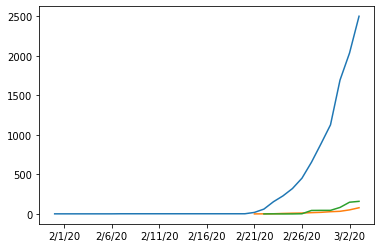

In [10]:
# Plotting each case locations:

conf_ts2['Italy'].plot()
death_ts2['Italy'].plot()
recov_ts2['Italy'].plot()


In [11]:
# Top 16 locations
top_16_locs = lst_locs[:16]
top_16_locs

['Ch-Hubei',
 'South Korea',
 'Italy',
 'Iran',
 'Ch-Guangdong',
 'Ch-Henan',
 'Ch-Zhejiang',
 'Ch-Hunan',
 'Ch-Anhui',
 'Ch-Jiangxi',
 'Ch-Shandong',
 'Others',
 'Ch-Jiangsu',
 'Ch-Chongqing',
 'Ch-Sichuan',
 'Ch-Heilongjiang']

# Confirmed Cases Comparation Plots

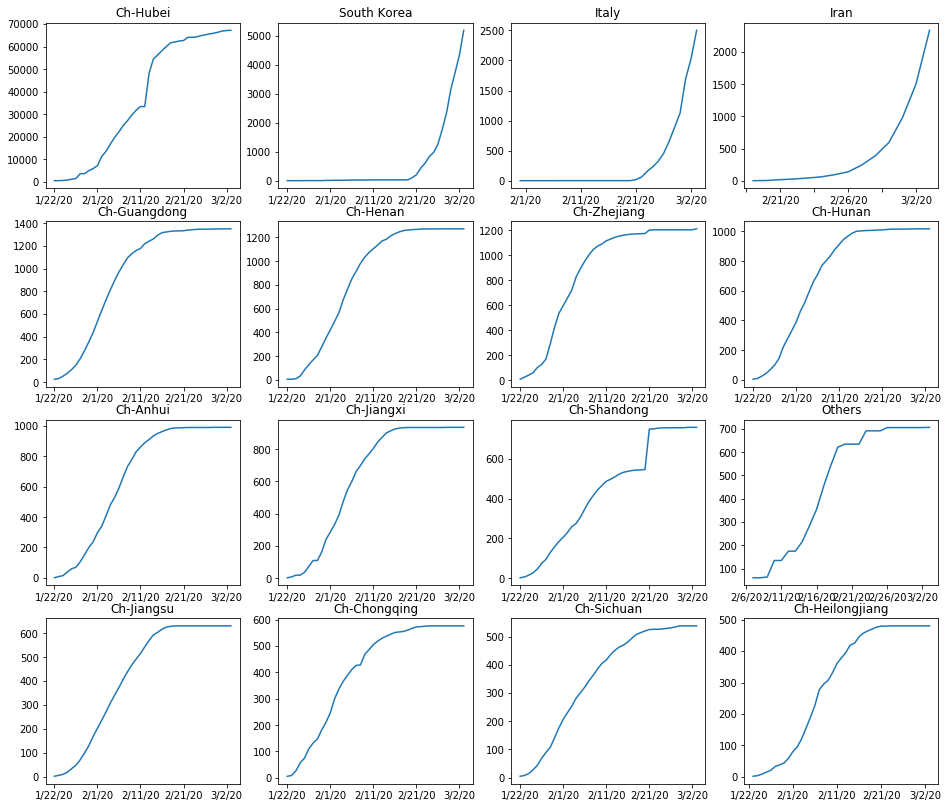

In [12]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    conf_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Death Cases Comparation Plots

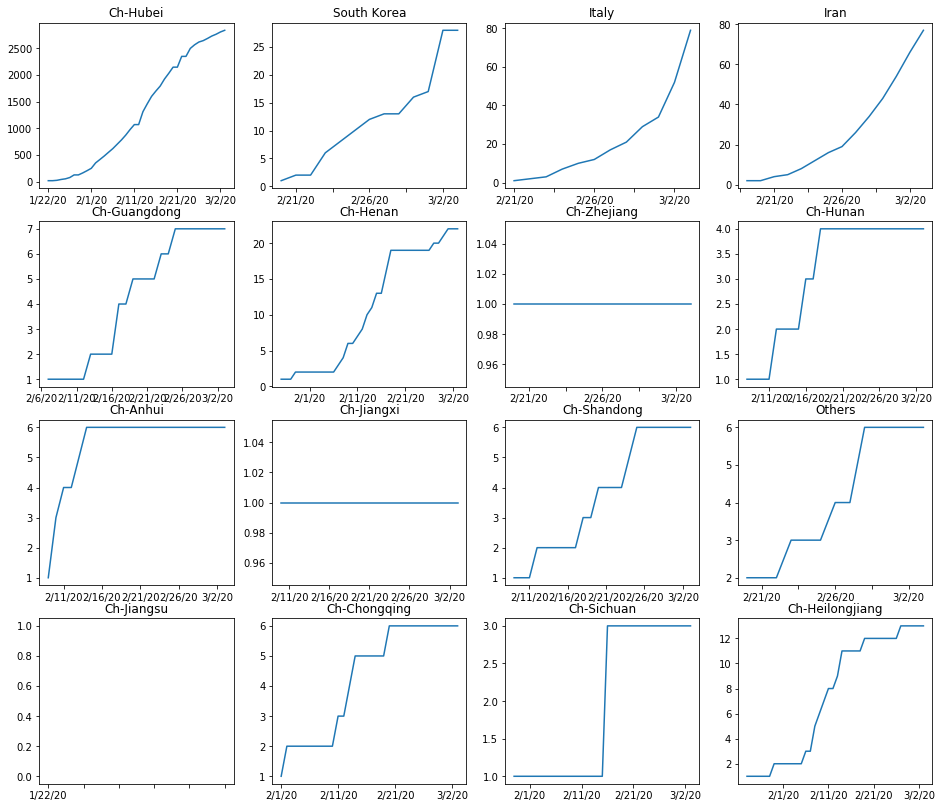

In [13]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    death_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Recovery Cases Comparation Plots

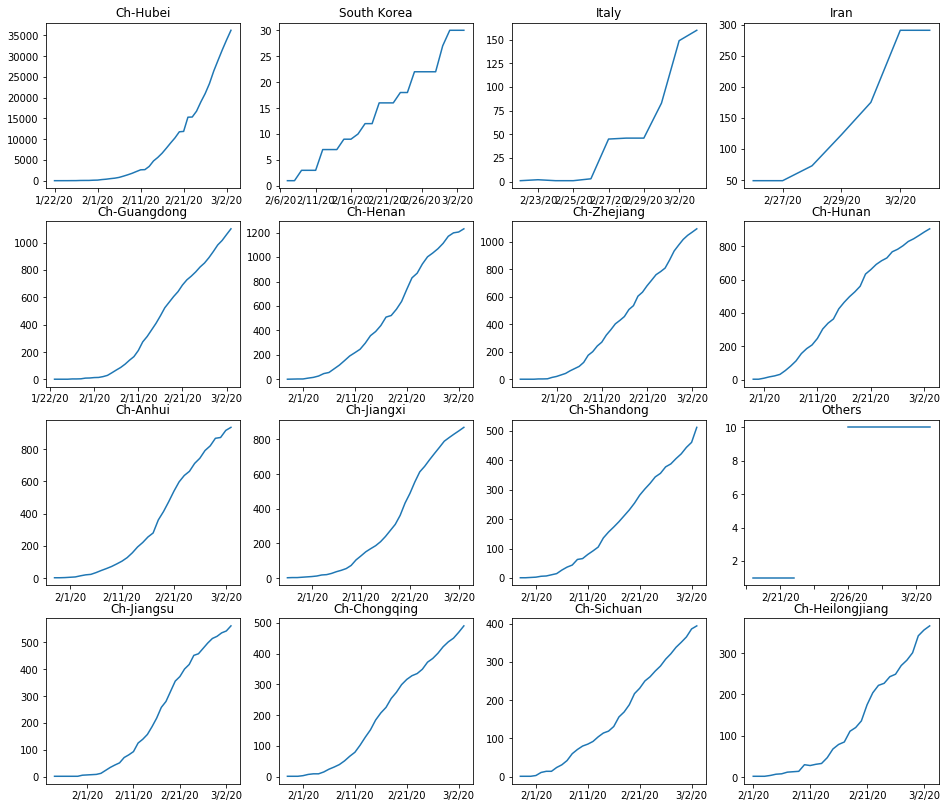

In [14]:
fig = plt.figure(figsize=(16,14))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10= fig.add_subplot(4,4,10)
ax11= fig.add_subplot(4,4,11)
ax12= fig.add_subplot(4,4,12)
ax13= fig.add_subplot(4,4,13)
ax14= fig.add_subplot(4,4,14)
ax15= fig.add_subplot(4,4,15)
ax16= fig.add_subplot(4,4,16)


ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

for count, axn in enumerate(ax_lst): 
    recov_ts2[top_16_locs[count]].plot(ax=axn)
    axn.set_title(top_16_locs[count])
    

# Tecnica Ross ( no pude )

In [15]:
#ross_st = pd.DataFrame()
#ross_st['y-1'] = conf_ts['Ch-Henan']
#ross_st.to_csv('ross_st.csv')

In [16]:
#ross_st2=pd.read_csv('ross_st.csv')

In [17]:
#ross_st2.head()

In [18]:
#Y = np.matrix(ross_st2['y'])
#teta = np.matrix(ross_st2[['y-1','y-2']])
#tetaT = teta.T
#fact = (teta.dot(tetaT))

In [19]:
conf_ts['Iran'].shape

(42,)

# Tecnica Cruve_fit - scipy  ( Se jugó, se gano )

In [20]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Len = 41
x = np.arange(len(conf_ts['South Korea']))
#y = conf_ts['Ch-Anhui'].values
#y = conf_ts['Iran'].values
#y = conf_ts['Ch-Henan'].values
#y = conf_ts['Ch-Hubei'].values
#y = conf_ts['South Korea'].values
#y = conf_ts['Italy'].values
#y = conf_ts['Ch-Guangdong'].values
#y = conf_ts['Mexico'].values
#y = conf_ts['Japan'].values
#y = conf_ts['France'].values
#y = conf_ts['Others'].values
#y = conf_ts['US'].values
#y = conf_ts['Hong Kong'].values
#y = conf_ts['Total'].values
#y = conf_ts['Germany'].values
#y = conf_ts['Spain'].values
#y = conf_ts['Ch-Ningxia'].values
#y = conf_ts['Bahrain'].values
#y = conf_ts['Kuwait'].values
#y = conf_ts['Ch-Inner Mongolia'].values
y = conf_ts['Ch-Jilin'].values




# Logistic Regretion Formula:
# L / (1 + e ^-k( x - a ))
# L -> Max Growth ,  a -> x value at midpoint ,  k -> Growth Rate

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

# Limitar: 0 < L < 100,000 ;  0 < k < 1 ;  0 < a < 50

In [21]:
popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
popt


array([91.65818052,  0.34619552, 13.5725264 ])

R2:  0.9974418974983104


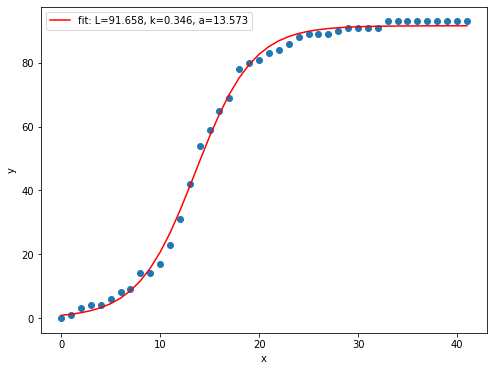

In [22]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
x2 = np.arange(50)
plt.plot(x, func(x, *popt), 'r-', label='fit: L=%5.3f, k=%5.3f, a=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
r2 = r2_score(y, func(x, *popt))
print('R2: ',r2)

# Building DataFrame with Crucial Data

In [23]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [24]:
res_df = pd.DataFrame()

res_df['Total_conf'] =  conf_df.iloc[:,-1]
res_df['Total_death'] =  death_df.iloc[:,-1]
res_df['Total_recov'] =  recov_df.iloc[:,-1]


row_df = pd.DataFrame(res_df.sum(axis = 0), columns=['Worldwide']).T
res_df = pd.concat([res_df, row_df])

#res_df.iloc[0:40]


In [25]:
loc_list = list(res_df.index[:40])
loc_list.append('Mexico')

log_g_curves = []

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

for loc_i in loc_list:
    x = np.arange(len(conf_ts[loc_i]))
    y = conf_ts[loc_i].values

    popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
    
    L = popt[0]
    k = popt[1]
    a = popt[2]
    r2 = r2_score(y, func(x, *popt))
    if loc_i == 'Total':
        loc_i = 'Worldwide'
    
    dict = {'location':loc_i,'L':L,'k':k,'a':a,'R2':r2}
    log_g_curves.append(dict)

In [26]:
final_1 = pd.DataFrame(log_g_curves).set_index('location')
final_1 = final_1.drop(['France','Germany','Others'])
final_1.index

Index(['Ch-Hubei', 'South Korea', 'Italy', 'Iran', 'Ch-Guangdong', 'Ch-Henan',
       'Ch-Zhejiang', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Ch-Shandong',
       'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang',
       'Ch-Beijing', 'Ch-Shanghai', 'Ch-Hebei', 'Ch-Fujian', 'Japan',
       'Ch-Guangxi', 'Ch-Shaanxi', 'Ch-Yunnan', 'Ch-Hainan', 'Spain',
       'Ch-Guizhou', 'Ch-Tianjin', 'Ch-Shanxi', 'Ch-Liaoning', 'US',
       'Singapore', 'Hong Kong', 'Ch-Jilin', 'Ch-Gansu', 'Ch-Xinjiang',
       'Ch-Inner Mongolia', 'Ch-Ningxia', 'Mexico'],
      dtype='object', name='location')

In [27]:
final_1.tail()

,L,k,a,R2
location,,,,
Ch-Gansu,91.396691,0.292325,11.142650,0.994346
Ch-Xinjiang,78.091611,0.221485,15.731930,0.995608
Ch-Inner Mongolia,75.700772,0.216926,13.521763,0.994845
Ch-Ningxia,73.568028,0.212815,14.262919,0.991050
Mexico,5.684350,1.000000,37.783605,0.966728


In [28]:
final_1.to_csv('final_1.csv')